In [12]:
#FIN611 Python assignment 
import pandas as pd
import statistics as st
import numpy as np

In [22]:
# the data file has been downloaded on the system and then uploaded in jupiter notebook as csv file.
# and from their we are reading the data to run our code.
df = pd.read_csv('data_ml.csv', parse_dates=['date'])

In [23]:
df.head

<bound method NDFrame.head of         stock_id       date  Advt_12M_Usd  Advt_3M_Usd  Advt_6M_Usd  \
0             13 2006-12-31          0.25         0.33         0.27   
1             13 2007-01-31          0.25         0.32         0.28   
2             13 2007-02-28          0.26         0.30         0.30   
3             17 2015-03-31          0.73         0.64         0.70   
4             17 2015-04-30          0.72         0.62         0.66   
...          ...        ...           ...          ...          ...   
283375      1205 2004-05-31          0.97         0.97         0.98   
283376      1205 2004-07-31          0.97         0.96         0.98   
283377      1205 2004-08-31          0.97         0.96         0.97   
283378      1205 2004-09-30          0.97         0.96         0.97   
283379       292 2000-04-30          0.41         0.63         0.52   

        Asset_Turnover  Bb_Yld    Bv  Capex_Ps_Cf  Capex_Sales  ...  \
0                 0.22    0.33  0.01         0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283380 entries, 0 to 283379
Data columns (total 99 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   stock_id                        283380 non-null  int64  
 1   date                            283380 non-null  object 
 2   Advt_12M_Usd                    283380 non-null  float64
 3   Advt_3M_Usd                     283380 non-null  float64
 4   Advt_6M_Usd                     283380 non-null  float64
 5   Asset_Turnover                  283380 non-null  float64
 6   Bb_Yld                          283380 non-null  float64
 7   Bv                              283380 non-null  float64
 8   Capex_Ps_Cf                     283380 non-null  float64
 9   Capex_Sales                     283380 non-null  float64
 10  Cash_Div_Cf                     283380 non-null  float64
 11  Cash_Per_Share                  283380 non-null  float64
 12  Cf_Sales        

In [8]:
df.describe()

,stock_id,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,Cash_Div_Cf,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
count,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000,...,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000
mean,605.143285,0.500312,0.500528,0.500402,0.502258,0.504533,0.501348,0.496572,0.499456,0.496544,...,0.501144,0.501177,0.499720,0.501921,0.500219,0.500356,0.012633,0.036206,0.071358,0.135854
std,350.260600,0.287845,0.287816,0.287841,0.287403,0.288816,0.288121,0.283728,0.285317,0.281583,...,0.288177,0.288317,0.286299,0.288845,0.287317,0.287291,0.177877,0.331932,0.531054,0.765346
min,1.000000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,-0.922000,-0.929000,-0.980000,-0.991000
25%,302.000000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.260000,...,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,-0.044000,-0.066000,-0.083000,-0.098000
50%,605.000000,0.500000,0.500000,0.500000,0.500000,0.505000,0.500000,0.500000,0.500000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.011000,0.027000,0.045000,0.073000
75%,909.000000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.740000,0.740000,0.730000,...,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.064000,0.122000,0.183000,0.281000
max,1212.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.176000,39.389000,106.929000,95.972000


In [24]:
# As asked in the question descriptive statistics of specified columns
df[['Asset_Turnover', 'Interest_Expense', 'Eps', 'Net_Margin', 'Roa', 'Roe', 'Ta','Total_Debt', 'R1M_Usd']].describe()

,Asset_Turnover,Interest_Expense,Eps,Net_Margin,Roa,Roe,Ta,Total_Debt,R1M_Usd
count,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000,283380.000000
mean,0.502258,0.495831,0.502315,0.503903,0.502904,0.497333,0.501350,0.501177,0.012633
std,0.287403,0.275126,0.286798,0.288563,0.286489,0.282200,0.288448,0.288317,0.177877
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,-0.922000
25%,0.250000,0.270000,0.260000,0.250000,0.260000,0.260000,0.250000,0.250000,-0.044000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.011000
75%,0.750000,0.720000,0.750000,0.750000,0.750000,0.730000,0.750000,0.750000,0.064000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.176000


In [9]:
import matplotlib
import matplotlib.pyplot as plt

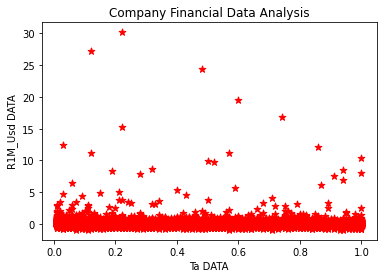

In [10]:
x= df['Ta']
y= df['R1M_Usd']
plt.scatter(x,y, marker='*',s=50,color='red' )

plt.title('Company Financial Data Analysis')
plt.xlabel('Ta DATA')
plt.ylabel('R1M_Usd DATA')
plt.show()

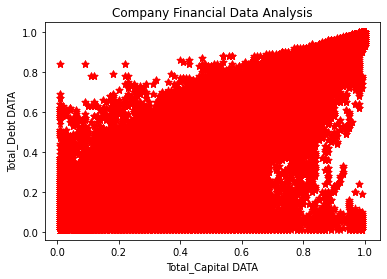

In [11]:
x= df['Total_Capital']
y= df['Total_Debt']
plt.scatter(x,y, marker='*',s=50,color='red' )

plt.title('Company Financial Data Analysis')
plt.xlabel('Total_Capital DATA')
plt.ylabel('Total_Debt DATA')
plt.show()

In [27]:
#Sorting the Test data from the overall data set 
databydate = pd.DataFrame(df)
databydate

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
0,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,0.02,0.27,1.00,0.92,0.84,0.88,0.089,0.104,0.344,-0.041
1,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,0.02,0.27,1.00,0.92,0.84,0.88,0.039,0.091,-0.011,-0.253
2,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,0.02,0.27,1.00,0.92,0.87,0.88,-0.012,0.101,0.118,-0.366
3,17,2015-03-31,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,...,0.40,0.75,1.00,1.00,1.00,0.99,0.174,-0.144,-0.518,-0.376
4,17,2015-04-30,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,...,0.40,0.75,1.00,1.00,1.00,0.99,-0.106,-0.576,-0.535,-0.113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283375,1205,2004-05-31,0.97,0.97,0.98,0.19,0.74,1.00,0.54,0.90,...,0.99,0.99,0.57,0.59,0.34,0.63,-0.029,-0.027,0.038,0.112
283376,1205,2004-07-31,0.97,0.96,0.98,0.19,0.75,1.00,0.53,0.90,...,0.99,0.99,0.58,0.60,0.29,0.64,0.028,0.077,0.175,0.122
283377,1205,2004-08-31,0.97,0.96,0.97,0.19,0.75,1.00,0.53,0.90,...,0.99,0.99,0.58,0.60,0.27,0.64,0.011,0.076,0.152,0.091
283378,1205,2004-09-30,0.97,0.96,0.97,0.18,0.93,1.00,0.52,0.90,...,0.99,0.99,0.57,0.60,0.26,0.66,0.045,0.178,0.196,0.040


In [28]:
#Divide the data into two parts and name them 'train_data' and 'test data'. 
#The 'train_data' should consist of all the dates before 01/01/2015. 
#The test_data should consist of all the dates from 01/01/2015 to 03/31/2019.
train_data = df.loc[df['date'] <= "2015-01-01 00:00:00"]
test_data = df.loc[df['date'] > "2015-01-01 23:59:59"]

test_data

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
3,17,2015-03-31,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,...,0.40,0.75,1.00,1.00,1.00,0.99,0.174,-0.144,-0.518,-0.376
4,17,2015-04-30,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,...,0.40,0.75,1.00,1.00,1.00,0.99,-0.106,-0.576,-0.535,-0.113
5,17,2015-05-31,0.71,0.63,0.64,0.40,0.47,0.01,0.70,0.74,...,0.40,0.75,1.00,1.00,1.00,0.99,-0.185,-0.252,-0.578,-0.194
6,17,2015-06-30,0.70,0.62,0.63,0.38,0.43,0.01,0.53,0.66,...,0.25,0.74,1.00,1.00,1.00,0.99,-0.418,-0.436,-0.635,0.309
7,17,2015-07-31,0.68,0.56,0.60,0.38,0.45,0.01,0.53,0.66,...,0.25,0.74,1.00,1.00,1.00,0.99,0.575,0.095,-0.361,2.139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283364,1158,2018-09-30,0.99,0.99,0.99,0.09,0.78,1.00,0.03,0.03,...,1.00,1.00,0.79,0.89,0.45,0.26,0.013,-0.116,0.000,0.000
283365,1158,2018-10-31,0.99,0.99,0.99,0.09,0.76,1.00,0.03,0.03,...,1.00,1.00,0.79,0.89,0.40,0.26,0.039,-0.065,0.000,0.000
283366,1158,2018-11-30,0.99,0.99,0.99,0.09,0.77,1.00,0.03,0.03,...,1.00,1.00,0.79,0.89,0.37,0.25,-0.151,-0.073,0.000,0.000
283367,1158,2018-12-31,0.99,0.99,0.99,0.09,0.97,1.00,0.03,0.03,...,1.00,1.00,0.81,0.91,0.38,0.26,0.071,0.000,0.000,0.000


In [29]:
train_data

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
0,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,0.02,0.27,1.00,0.92,0.84,0.88,0.089,0.104,0.344,-0.041
1,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,0.02,0.27,1.00,0.92,0.84,0.88,0.039,0.091,-0.011,-0.253
2,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,0.02,0.27,1.00,0.92,0.87,0.88,-0.012,0.101,0.118,-0.366
30,29,2002-09-30,0.43,0.18,0.28,0.29,0.78,0.01,0.30,0.86,...,0.16,0.49,1.00,1.00,0.99,0.97,0.169,1.084,0.699,4.169
31,29,2002-10-31,0.41,0.18,0.23,0.29,0.58,0.01,0.30,0.86,...,0.16,0.49,1.00,1.00,0.99,0.97,1.239,0.371,1.630,7.144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283375,1205,2004-05-31,0.97,0.97,0.98,0.19,0.74,1.00,0.54,0.90,...,0.99,0.99,0.57,0.59,0.34,0.63,-0.029,-0.027,0.038,0.112
283376,1205,2004-07-31,0.97,0.96,0.98,0.19,0.75,1.00,0.53,0.90,...,0.99,0.99,0.58,0.60,0.29,0.64,0.028,0.077,0.175,0.122
283377,1205,2004-08-31,0.97,0.96,0.97,0.19,0.75,1.00,0.53,0.90,...,0.99,0.99,0.58,0.60,0.27,0.64,0.011,0.076,0.152,0.091
283378,1205,2004-09-30,0.97,0.96,0.97,0.18,0.93,1.00,0.52,0.90,...,0.99,0.99,0.57,0.60,0.26,0.66,0.045,0.178,0.196,0.040


In [30]:
#Print the descriptive statistics of the variables ‘Asset_Turnover', 'Interest_Expense', 'Eps', 'Net_Margin', 'Roa', 'Roe', 'Ta','Total_Debt', and 'R1M_Usd',
test_data[['Asset_Turnover', 'Interest_Expense', 'Eps', 'Net_Margin', 'Roa', 'Roe', 'Ta','Total_Debt', 'R1M_Usd']].describe()

,Asset_Turnover,Interest_Expense,Eps,Net_Margin,Roa,Roe,Ta,Total_Debt,R1M_Usd
count,57913.000000,57913.000000,57913.000000,57913.000000,57913.000000,57913.000000,57913.000000,57913.000000,57913.000000
mean,0.503361,0.490858,0.503711,0.504433,0.503225,0.495048,0.499995,0.499056,0.010183
std,0.289536,0.282817,0.286963,0.288825,0.287933,0.282022,0.288561,0.288360,0.216750
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,-0.826000
25%,0.250000,0.250000,0.260000,0.250000,0.250000,0.260000,0.250000,0.250000,-0.040000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.007000
75%,0.750000,0.730000,0.750000,0.760000,0.750000,0.730000,0.750000,0.750000,0.055000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.176000


In [31]:
train_data[['Asset_Turnover', 'Interest_Expense', 'Eps', 'Net_Margin', 'Roa', 'Roe', 'Ta','Total_Debt', 'R1M_Usd']].describe()

,Asset_Turnover,Interest_Expense,Eps,Net_Margin,Roa,Roe,Ta,Total_Debt,R1M_Usd
count,225467.000000,225467.000000,225467.000000,225467.000000,225467.000000,225467.000000,225467.000000,225467.000000,225467.000000
mean,0.501975,0.497109,0.501957,0.503767,0.502822,0.497920,0.501697,0.501722,0.013262
std,0.286853,0.273102,0.286755,0.288497,0.286118,0.282243,0.288419,0.288304,0.166427
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,-0.922000
25%,0.260000,0.270000,0.250000,0.250000,0.260000,0.260000,0.250000,0.250000,-0.045000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.012000
75%,0.750000,0.720000,0.750000,0.750000,0.750000,0.730000,0.750000,0.750000,0.067000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.233000
